In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
# load general packages
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# load modules related to this exercise
from model_dc_multidim3 import model_dc_multidim
import time

In [2]:
t0 = time.time()
model = model_dc_multidim()
model.setup()
model.create_grids()
t1 = time.time()
print(f'time: {t1-t0:.8} seconds to create grids') 
model.solve()
t2 = time.time()
print(f'time: {t2-t1:.8} seconds to solve')
model.simulate()
t3 = time.time() 
print(f'time: {t3-t2:.8} seconds to simulate')
print(f'time: {t3-t0:.8} seconds in total')

time: 0.088561058 seconds to create grids
time: 284.80814 seconds to solve
time: 2.0338449 seconds to simulate
time: 286.93055 seconds in total


Not working
k=0.0409


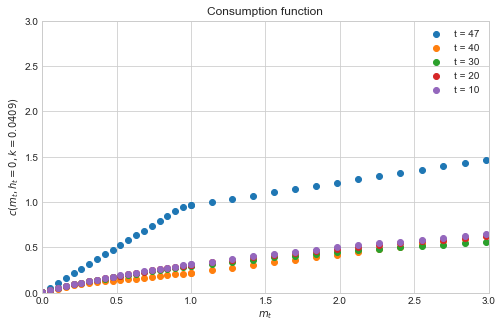

Working part-time
k=0.0409


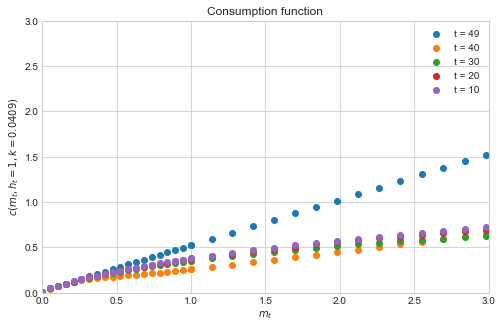

Working full-time
k=0.0409


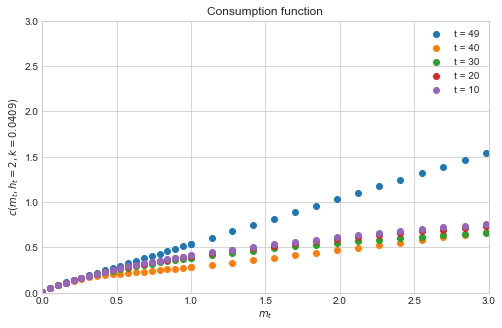

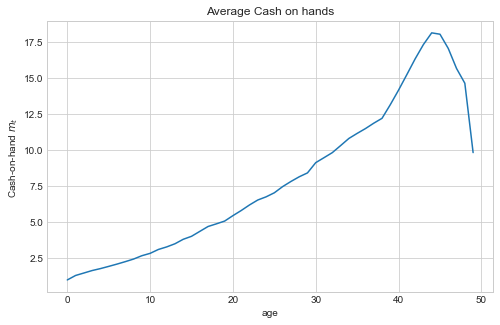

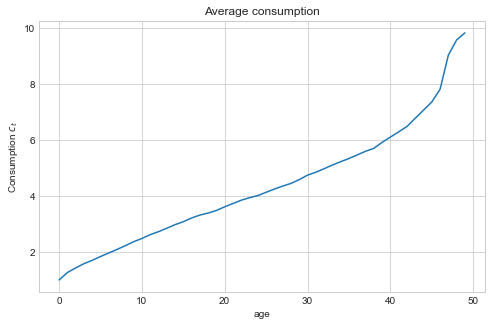

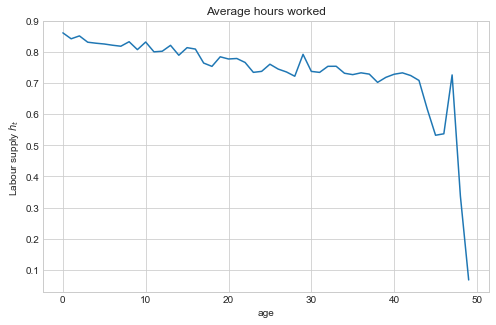

[[1.5        1.5        1.5        ... 1.5        1.5        1.5       ]
 [1.63195079 1.7        1.63195079 ... 1.7        1.7        1.63195079]
 [1.76390158 1.83195079 1.76390158 ... 1.9        1.9        1.76390158]
 ...
 [8.93486819 9.54316345 9.27511424 ... 9.07926187 9.60706503 9.2029174 ]
 [9.06681899 9.67511424 9.40706503 ... 9.27926187 9.73901582 9.2029174 ]
 [9.06681899 9.80706503 9.53901582 ... 9.27926187 9.87096661 9.33486819]]


In [3]:
# Figure - policy functions
def figure_multi_dim(par,sol,h,i_k):
    k = par.grid_k[i_k]
    if h == 0:
        print(f'Not working')
        ts = [par.T-3, par.T-10, par.T-20, par.T-30, par.T-40]
        print(f'k={k:.3}')
    elif h == 1:
        print(f'Working part-time')
        print(f'k={k:.3}')
        ts = [par.T-1, par.T-10, par.T-20, par.T-30, par.T-40]
    elif h == 2:
        print(f'Working full-time')
        print(f'k={k:.3}')
        ts = [par.T-1, par.T-10, par.T-20, par.T-30, par.T-40]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,h,:,i_k], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,h_{{t}} = {h}, k = {k:.3})$")
    ax.set_xlim([0,3])
    ax.set_ylim([0,3])
    ax.set_title(f'Consumption function')
    plt.legend()
    plt.show()

figure_multi_dim(model.par,model.sol,0,2)
figure_multi_dim(model.par,model.sol,1,2)
figure_multi_dim(model.par,model.sol,2,2)

# Figures - simulations

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT),np.mean(model.sim.m,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Cash-on-hand $m_t$")
ax.set_title(f'Average Cash on hands')
plt.show()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT),np.mean(model.sim.c,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Consumption $c_t$")
ax.set_title(f'Average consumption')
plt.show()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT),np.mean(model.sim.h,1))
ax.set_xlabel(f"age")
ax.set_ylabel(f"Labour supply $h_t$")
ax.set_title(f'Average hours worked')
plt.show()

print(model.sim.k)
k = model.sim.k
m = model.sim.m
c = model.sim.c
h = model.sim.h
a = model.sim.a
wage = model.sim.wage
p = model.sim.p
s = model.sim.s

shock1 = model.par.eps_w
shock2 = model.par.eps_ts

In [8]:
def figure_dashboard(par,sim):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(2,3,1)
    ax.plot(np.arange(model.par.simT),np.mean(model.sim.m,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Cash-on-hand $m_t$")
    ax.set_title(f'Average Cash on hands')

    ax = fig.add_subplot(2,3,2)
    ax.plot(np.arange(model.par.simT),np.mean(model.sim.c,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Consumption $c_t$")
    ax.set_title(f'Average consumption')

    ax = fig.add_subplot(2,3,3)
    ax.plot(np.arange(model.par.simT),np.mean(model.sim.h,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Labour supply $h_t$")
    ax.set_title(f'Average hours worked')

    ax = fig.add_subplot(2,3,4)
    ax.plot(np.arange(model.par.simT),np.mean(model.sim.wage,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Wage $W_t$")
    ax.set_title(f'Average wage')

    ax = fig.add_subplot(2,3,5)
    ax.plot(np.arange(model.par.simT),np.mean(model.sim.k,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"k")
    ax.set_title(f'Average Human Capital')

    ax = fig.add_subplot(2,3,6)
    ax.plot(np.arange(model.par.simT),np.mean(model.sim.p,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"p")
    ax.set_title(f'p')
    plt.show()

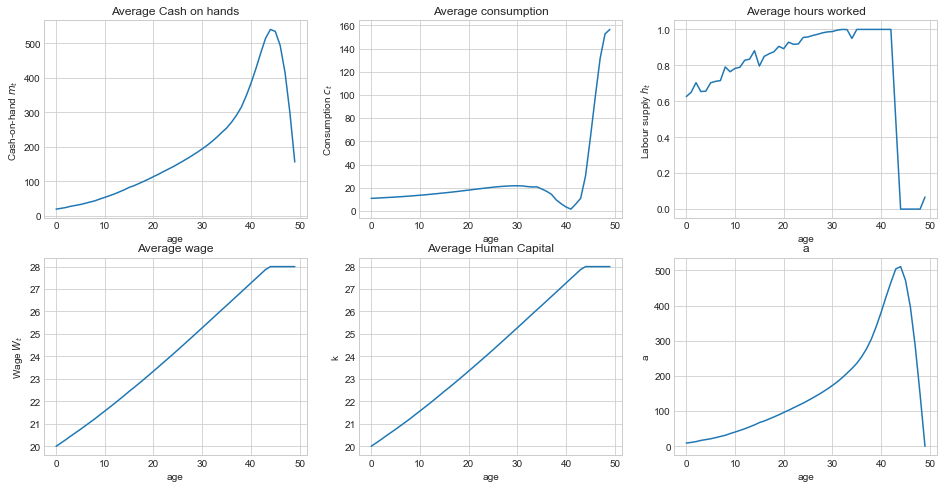

In [67]:
figure_dashboard(model.par,model.sim)

sigma_w = 0.01
time: 18.297055 seconds


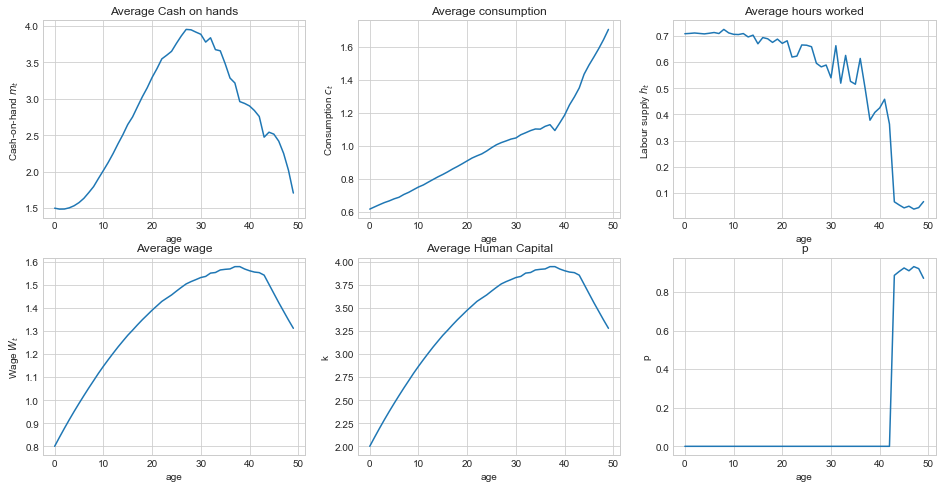

sigma_w = 0.25
time: 17.809357 seconds


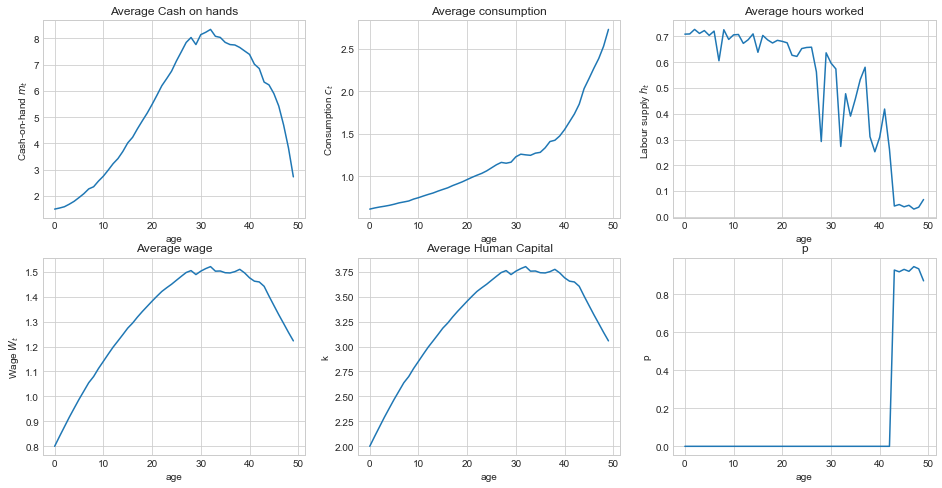

In [9]:
#constructing a dashboard for parameter tuning:
#sigma_epsilon = [0.3]
sigma_w = [0.01,0.25]
#kappa = [0.4]

for i,val in enumerate(sigma_w):
    t0 = time.time()
    model = model_dc_multidim()
    model.setup()
    model.par.kappa = 0.4
    model.par.sigma_w = val
    model.par.phi3 = 0.97
    model.par.k_start = 2
    model.par.m_start = 1.5
    model.create_grids()
    model.solve()
    model.simulate()
    print(f'sigma_w = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure_dashboard(model.par,model.sim)


In [ ]:
########### SKRIV HER ##################

SIGMA EPS påvirker hele markedet.
Kan man lave den individuel, det er derfor den er så "hakket"



SIGMA W påvirker ikke valg taget af forbrugere. Større w ændrer ikk gennemslag.
SKal denne tilføjes til human kapital, så det er et permanent stød?


Vi skal finde et niveau, som i 2017, hvor vi vil sætte w m og c efter. Så det er nemmere at fitte modellen.
Dette kan fx. være 1=100.000 DKK? Eller en standard årsløn ved start, (20.000*12?), som vi så også kan sætte pension efter.



Jeg har indsat så Humankapital aftager med 0,97 (3%), for at undgå enorme lønninger ved slutningen af perioden. 












sigma_w = 0.0001
time: 226.58905 seconds


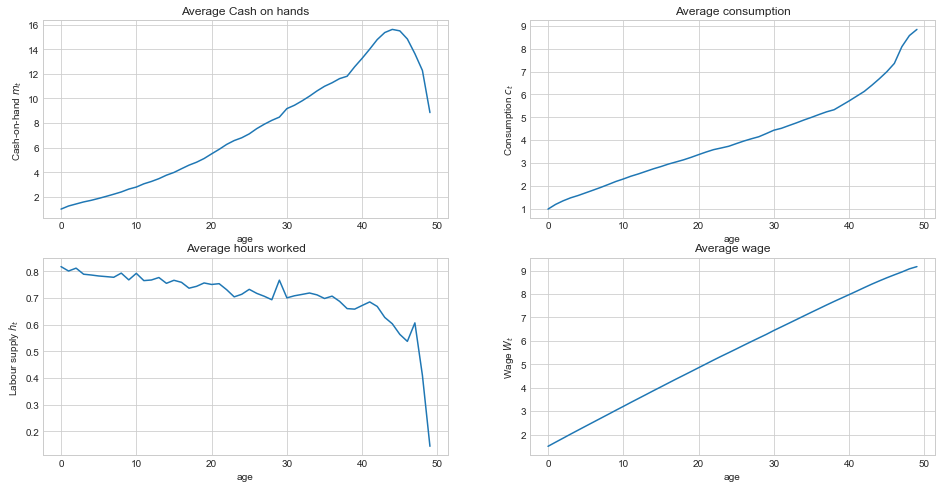

sigma_w = 0.001
time: 221.68101 seconds


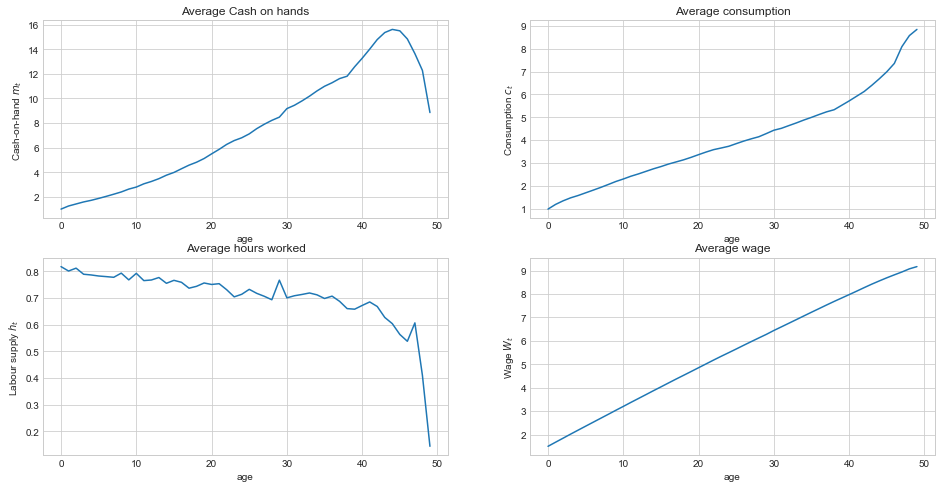

sigma_w = 0.01
time: 216.43186 seconds


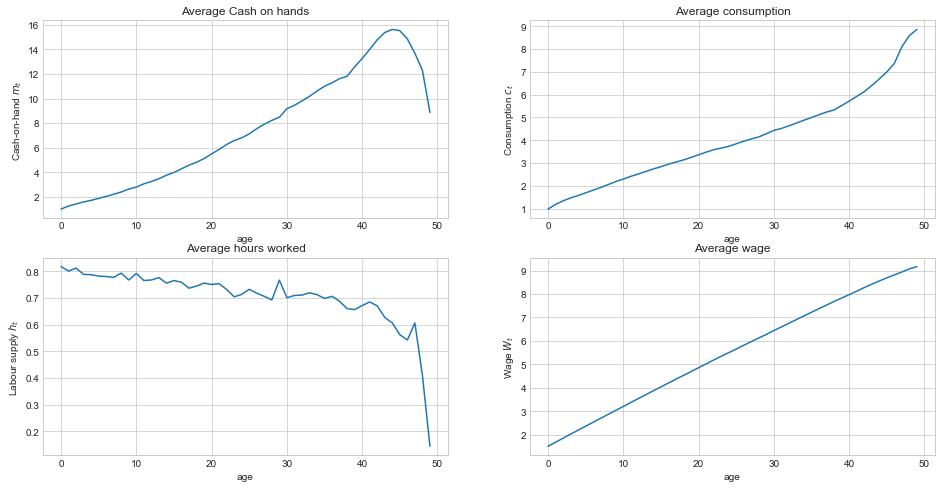

In [26]:
#constructing a dashboard for parameter tuning:
sigma_w = [0.0001,0.001,0.01]

for i,val in enumerate(sigma_w):
    t0 = time.time()
    model = model_dc_multidim()
    model.setup()
    model.par.sigma_w= val
    model.par.sigma_epsilon = 0.5
    model.create_grids()
    model.solve()
    model.simulate()
    print(f'sigma_w = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure_dashboard(model.par,model.sim)

sigma_w = 0.2
time: 214.11581 seconds


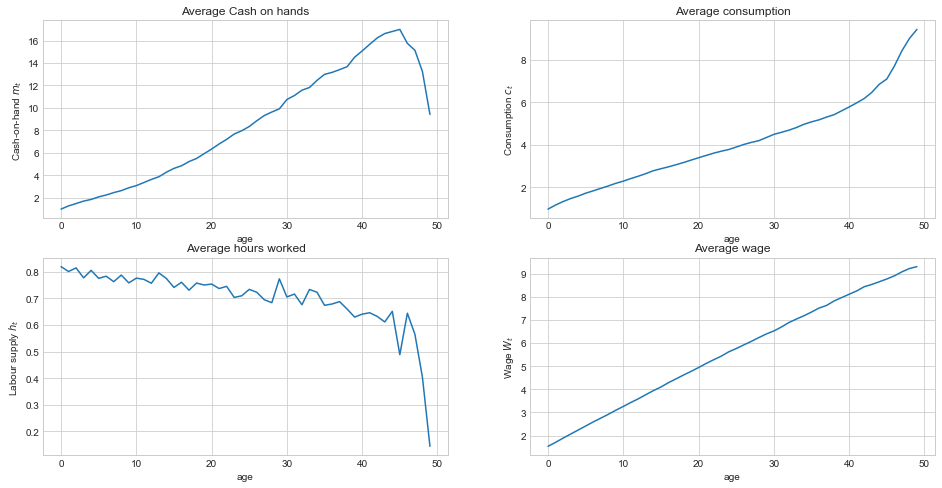

In [30]:
#constructing a dashboard for parameter tuning:
sigma_w = [0.]

for i,val in enumerate(sigma_w):
    t0 = time.time()
    model = model_dc_multidim()
    model.setup()
    model.par.sigma_w= val
    model.par.sigma_epsilon = 0.5
    model.create_grids()
    model.solve()
    model.simulate()
    print(f'sigma_w = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure_dashboard(model.par,model.sim)